<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/2.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практика Pandas

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/2.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Pandas.ipynb)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.0.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [4]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [5]:
rows, columns = df.shape

print("Количество строк:", rows)
print("Количество столбцов:", columns)

Количество строк: 32561
Количество столбцов: 15


In [6]:
#альтернативный способ более подробная статистика
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


3) Какие типы данных у элементов этого датасета?

In [7]:
df.dtypes
# "int64" обозначает тип данных целых чисел
# "float64" - тип данных вещественных чисел
# "object" - тип данных строк.

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [9]:
# сначала я стал искать None 
features_with_missing_values = df.isna().any()

print(features_with_missing_values)

# и посчитал их...
missing_values_count = df.isna().sum()

print(missing_values_count)

# но это было бессмысленно

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [16]:
# тогда я посчитал количество 0 по столбцам
zero_count = (df == 0).sum()
print(zero_count)
# однако сверившись с сайтом обнаружил, что 0 также не считается потерянными значениями... capital-gain  Missing Values  = false

age                   0
workclass             0
fnlwgt                0
education             0
education.num         0
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain      29849
capital.loss      31042
hours.per.week        0
native.country        0
income                0
dtype: int64


In [15]:
question = (df == " ?").sum() # затем я более внимательно всмотрелся в датасет и обнаружил, что вместо Null и 0 используется значок ?. Как бонус перед ним ещё и пробел поставили. 
# То есть надо искать  " ?"
print(question)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:  

**Нет информации**: Пропуски могут возникать, если определенные признаки не были заполнены или не были известны в момент сбора данных. 

**Ошибка в сборе данных**: Пропуски также могут возникать из-за ошибок в сборе данных. Например, ошибка при внесении данных или некорректное заполнение формы опроса может привести к пропускам. Или сотрудник не смог прочитать, что написано в анкете

**Отсутствие ответа**: Некоторые опрошенные могли выбрать не отвечать на определенные вопросы, по разным причинам, включая приватность или нежелание раскрывать определенную информацию. 

**Неучтенные категории**: Возможно, что некоторые категории класса работы или профессии не были учтены в изначальной анкете или опросе, что могло привести к пропускам.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [18]:
unique_workclasses = df['workclass'].unique()
num_unique_workclasses = len(unique_workclasses)

print("Различные рабочие классы (workclass):")
for workclass in unique_workclasses:
    print(workclass)

print("\nОбщее количество различных рабочих классов (учитывая None (?) ):", num_unique_workclasses)

Различные рабочие классы (workclass):
 State-gov
 Self-emp-not-inc
 Private
 Federal-gov
 Local-gov
 ?
 Self-emp-inc
 Without-pay
 Never-worked

Общее количество различных рабочих классов (учитывая None (?) ): 9


7) Какой средний возраст женщин и мужчин?

In [41]:
average_age_by_sex = df.groupby('sex')['age'].mean()

print("Средний возраст женщин и мужчин:")
print(round(average_age_by_sex, 1)) #округлил до десятых

average_age = df['age'].mean()

print("Средний возраст людей:")
print(round(average_age, 1))

Средний возраст женщин и мужчин:
sex
 Female    36.9
 Male      39.4
Name: age, dtype: float64
Средний возраст людей:
38.6


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='count', ylabel='education'>

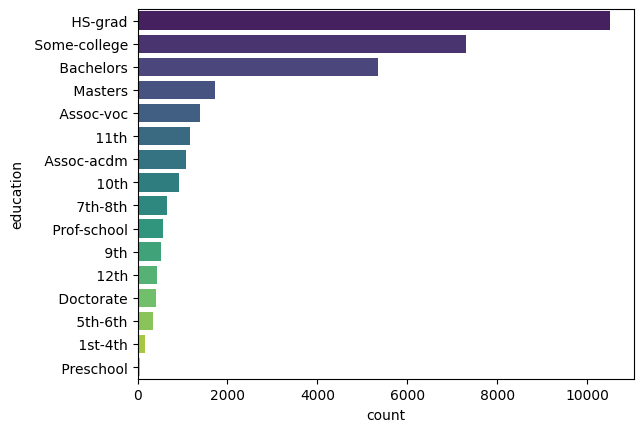

In [42]:
import seaborn as sns

# Получение количества людей с каждым уровнем образования
education_counts = df['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

# Создание графика с использованием Seaborn
sns.barplot(x='count', y='education', data=education_counts, palette='viridis')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [51]:

income_stats = df.groupby('income')['age'].agg(['mean', 'std']) # группировка

income_stats.rename(columns={'mean': 'средний_возраст', 'std': 'стандартное_отклонение'}, inplace=True) #пояснительнные столбцы вставим

# Вывод статистики
print(income_stats)

        средний_возраст  стандартное_отклонение
income                                         
 <=50K        36.783738               14.020088
 >50K         44.249841               10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [59]:
condition = (df['income'] == ' >50K') & (df['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']))


income_stats = df.groupby('income')['education'] # группировка

print(income_stats)
# Проверка, правда ли, что все люди, получающие больше 50K, имеют высшее образование
all_high_education = condition.all()

print("Верно ли, что все люди, получающие больше 50K, имеют высшее образование:", all_high_education) #не правда

Верно ли, что все люди, получающие больше 50K, имеют высшее образование: False


In [60]:
# Чтобы успокоиться и проверить, что это действительно так 

high_income_data = df[df['income'] == ' >50K']

# Группировка данных по образованию и подсчет количества людей в каждой группе
education_counts = high_income_data['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

# Вывод результата
print("Лица с доходом более 50K, сгруппированные по образованию:")
print(education_counts)

Лица с доходом более 50K, сгруппированные по образованию:
        education  count
0       Bachelors   2221
1         HS-grad   1675
2    Some-college   1387
3         Masters    959
4     Prof-school    423
5       Assoc-voc    361
6       Doctorate    306
7      Assoc-acdm    265
8            10th     62
9            11th     60
10        7th-8th     40
11           12th     33
12            9th     27
13        5th-6th     16
14        1st-4th      6


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [66]:
# Фильтрация данных для женатых мужчин
married_men = df[(df['marital.status'].str.startswith(' Married')) & (df['sex'] == ' Male')]

# Фильтрация данных для холостых мужчин
single_men = df[(~df['marital.status'].str.startswith(' Married')) & (df['sex'] == ' Male')]

# Вычисление доли зарабатывающих много среди женатых и холостых мужчин
percentage_high_income_married = (married_men['income'] == ' >50K').mean()
percentage_high_income_single = (single_men['income'] == ' >50K').mean()

print("Доля зарабатывающих много среди женатых мужчин:", percentage_high_income_married)
print("Доля зарабатывающих много среди холостых мужчин:", percentage_high_income_single)

if percentage_high_income_married > percentage_high_income_single:
    print("Среди женатых мужчин доля зарабатывающих много больше.")
elif percentage_high_income_married < percentage_high_income_single:
    print("Среди холостых мужчин доля зарабатывающих много больше.")
else:
    print("Доли одинаковы среди женатых и холостых мужчин.")

Доля зарабатывающих много среди женатых мужчин: 0.4405139945351156
Доля зарабатывающих много среди холостых мужчин: 0.08449509031397745
Среди женатых мужчин доля зарабатывающих много больше.


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [23]:
pivot_table = pd.crosstab(index=df['native.country'], columns=df['income'], values=df['hours.per.week'], aggfunc='mean')

# Отобразим сводную таблицу
print(pivot_table)

income                           <=50K       >50K
native.country                                   
 ?                           40.164760  45.547945
 Cambodia                    41.416667  40.000000
 Canada                      37.914634  45.641026
 China                       37.381818  38.900000
 Columbia                    38.684211  50.000000
 Cuba                        37.985714  42.440000
 Dominican-Republic          42.338235  47.000000
 Ecuador                     38.041667  48.750000
 El-Salvador                 36.030928  45.000000
 England                     40.483333  44.533333
 France                      41.058824  50.750000
 Germany                     39.139785  44.977273
 Greece                      41.809524  50.625000
 Guatemala                   39.360656  36.666667
 Haiti                       36.325000  42.750000
 Holand-Netherlands          40.000000        NaN
 Honduras                    34.333333  60.000000
 Hong                        39.142857  45.000000


13)  Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму: 
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю
  
  Подсказка:

 4.  summary_table = summary_table[summary_table['capital.diff'] != 0 ]
  Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.
  
  - В нашем случае, можно воспользоваться методом pd.qcut() и равномерно разделить наш набор данных на целевое количество категорий

 5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()
  Пример:

summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

In [41]:
#способ 1 быстрый и странный
pivot_table = pd.crosstab(index=df.loc[(df['capital.gain'] - df['capital.loss'] != 0), 'education'], 
                         columns=pd.qcut(df.loc[(df['capital.gain'] - df['capital.loss'] != 0), 'capital.gain'] - df.loc[(df['capital.gain'] - df['capital.loss'] != 0), 'capital.loss'], q =10), 
                         values=df.loc[(df['capital.gain'] - df['capital.loss'] != 0), 'capital.gain'] - df.loc[(df['capital.gain'] - df['capital.loss'] != 0), 'capital.loss'], 
                         aggfunc='count')
pivot_table

col_0,"(-4356.001, -1977.0]","(-1977.0, -1887.0]","(-1887.0, -1594.0]","(-1594.0, 2174.0]","(2174.0, 3137.0]","(3137.0, 4787.0]","(4787.0, 7298.0]","(7298.0, 8614.0]","(8614.0, 15024.0]","(15024.0, 99999.0]"
education,,,,,,,,,,
10th,11,4,10,13,11,9,3,1,2,4
11th,10,3,14,17,9,12,10,6,5,0
12th,1,0,6,8,2,5,1,3,3,1
1st-4th,2,0,2,1,0,3,0,1,0,0
5th-6th,6,2,2,3,3,4,5,0,0,0
7th-8th,7,3,9,10,19,7,6,2,1,0
9th,1,0,7,13,9,7,2,0,0,1
Assoc-acdm,14,15,17,16,13,12,14,16,17,3
Assoc-voc,19,13,12,18,22,31,34,16,19,4


In [26]:
#способ 2 традиционный


helper_df = df[['education']].copy()  # Создаем копию, чтобы избежать предупреждения
helper_df['capital.diff'] = df['capital.gain'] - df['capital.loss']


helper_df = helper_df[helper_df['capital.diff'] != 0]


helper_df['categories'] = pd.qcut(helper_df['capital.diff'], q=10)


pivot_table = pd.pivot_table(data=helper_df, index='education', columns='categories', values='capital.diff', aggfunc='count')

print(pivot_table)

categories     (-4356.001, -1977.0]  (-1977.0, -1887.0]  (-1887.0, -1594.0]  \
education                                                                     
 10th                            11                   4                  10   
 11th                            10                   3                  14   
 12th                             1                   0                   6   
 1st-4th                          2                   0                   2   
 5th-6th                          6                   2                   2   
 7th-8th                          7                   3                   9   
 9th                              1                   0                   7   
 Assoc-acdm                      14                  15                  17   
 Assoc-voc                       19                  13                  12   
 Bachelors                      114                 104                  60   
 Doctorate                       25                 

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [83]:
high_income_women = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
# Группировка данных по странам (native-country) и подсчет количества женщин с большой зарплатой для каждой страны
country_income_counts = high_income_women['native.country'].value_counts()
# страну с наибольшим количеством женщин, получающих больше 50K, в среднем, на одного человека
most_common_country = country_income_counts.idxmax()
average_income_per_woman = country_income_counts.max()

print("Женщины из", most_common_country, "получают в среднем большую зарплату (>50K) чаще, среди стран с наибольшим количеством женщин.")
print("Среднее количество женщин с большой зарплатой в этой стране:", average_income_per_woman)

Женщины из  United-States получают в среднем большую зарплату (>50K) чаще, среди стран с наибольшим количеством женщин.
Среднее количество женщин с большой зарплатой в этой стране: 1072


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [86]:
df['magic_salary'] = np.where(df['income'] == ' <=50K', np.random.randint(0, 51), np.random.randint(51, 201))

# Вычисление средней зарплаты в час для групп людей с одним уровнем образования
average_hourly_income = df.groupby('education')['magic_salary'].mean()

# Вывод средней зарплаты в час для каждого уровня образования
print("Средняя зарплата в час по уровню образования на основе случайной колонки 'magic_salary':")
print(average_hourly_income)

Средняя зарплата в час по уровню образования на основе случайной колонки 'magic_salary':
education
 10th             50.442658
 11th             48.719149
 12th             51.535797
 1st-4th          47.000000
 5th-6th          48.381381
 7th-8th          49.934985
 9th              48.883268
 Assoc-acdm       70.816307
 Assoc-voc        72.256151
 Bachelors        89.452288
 Doctorate       125.983051
 HS-grad          60.864965
 Masters         105.337783
 Preschool        43.000000
 Prof-school     125.250000
 Some-college     64.306268
Name: magic_salary, dtype: float64
